- O que vamos aprender:
    - utilizar a bilioteca Prophet do Facebook para realizar análises preditivas
    - utilizar a biblioteca Yahoo Finance para buscar dados de ações

- Projeto da aula:
    - Prever o valor futuro de uma açã

# Instalando e carregando as bibliotecas

In [1]:
! pip install yfinance prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/ca/41/b78b8e03730c0f7b8d7a16bc8bc107406a2ec968c2dc40358d4a6e59da1b/holidays-0.41-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f1

In [3]:
import yfinance  as yf
from prophet import Prophet
from prophet.plot import plot_plotly

# Carregando os dados históricos


In [4]:
ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history('2y')

Digite o código da ação: PETR4.SA


C:\Users\bielf\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


# Gráfico da variação do período histórico

<Axes: xlabel='Date'>

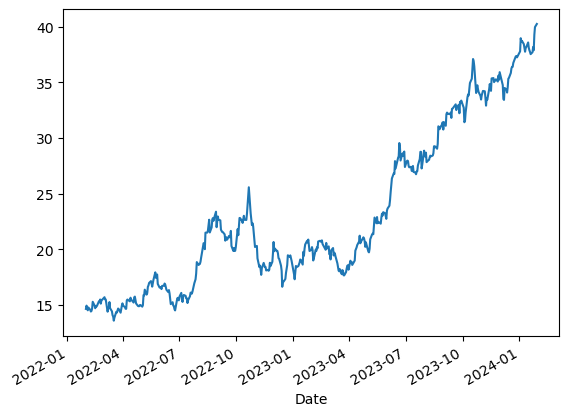

In [10]:
dados.Close.plot()
# o "close" é a coluna de fechamento da tabela da ação analisada

# Preparando os dados de treinamento

In [ ]:
# Resetando o índice do DataFrame
treinamento = dados.reset_index()

In [ ]:
# Retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [ ]:
# Selecionando as colunas de data e valor de fechamento
treinamento = treinamento[['Date', 'Close']]

In [ ]:
# Renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ['ds', 'y']

# Treinando o nosso modelo


In [ ]:
# Criando o modelo
modelo = Prophet()

In [ ]:
# Treinando o modelo com os dados de treinamento
modelo.fit(treinamento)

In [ ]:
# Especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

In [ ]:
# Gerando as previsões
previsoes = modelo.predict(periodo)

# Gerando o gráfico de previsões

In [ ]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")